<a href="https://colab.research.google.com/github/SanParraguez/me7200-signals/blob/main/01_signal_processing/01_signal_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ME7200 Procesamiento de Señales y Aprendizaje de Máquinas en Mantenimiento Predictivo

---

# Procesamiento de señales temporales

---

## Cargar repositorio y librerías

In [1]:
!git clone https://github.com/SanParraguez/me7200-signals.git

Cloning into 'me7200-signals'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 76 (delta 23), reused 0 (delta 0), pack-reused 33
Unpacking objects: 100% (76/76), done.


In [2]:
%cd /content/me7200-signals/
!ls

/content/me7200-signals
01_signal_processing  bin  data  README.md


Importar librerías necesarias

In [3]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from scipy.signal import hilbert
from scipy.fftpack import fft, fftfreq

In [4]:
plt.rcParams['font.size'] = 14

## Cargar y visualizar datos

In [6]:
data_inner = sio.loadmat('data/01_inner.mat')

x = data_inner['x'].squeeze()   # .squeeze() remueve dimensiones de largo 1
t = data_inner['t'].squeeze()

print(f'x.shape: {x.shape}')
print(f't.shape: {t.shape}')

x.shape: (122136,)
t.shape: (122136,)


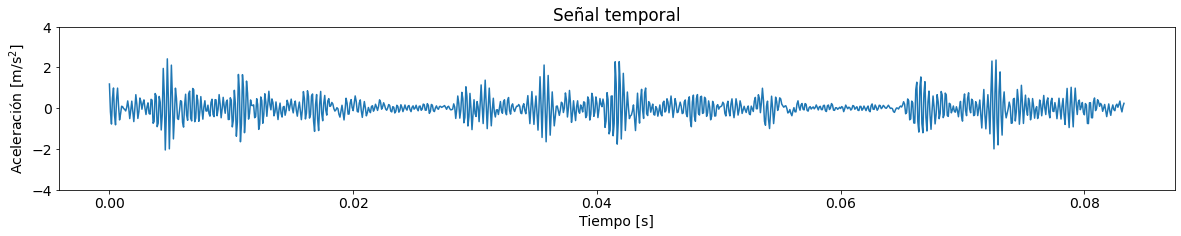

In [7]:
fig, axes = plt.subplots(figsize=(20, 3))
axes.plot(t[:1000], x[:1000])
axes.set(title='Señal temporal', xlabel='Tiempo [s]', ylabel='Aceleración [m/s$^2$]',
         ylim=(-4, 4))
plt.show()

Obtener envolvente de la señal

In [8]:
env = np.abs(hilbert(x))

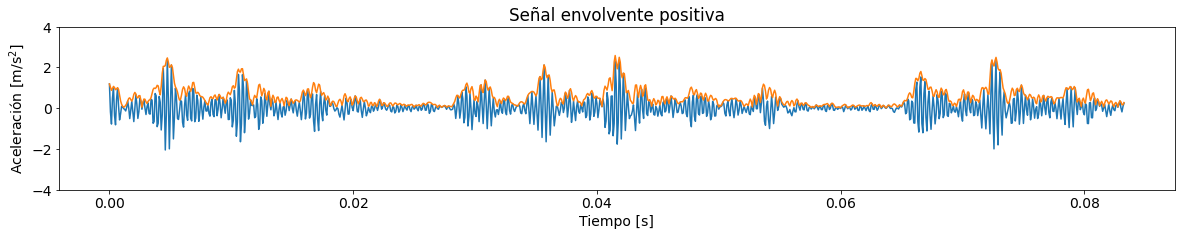

In [9]:
fig, axes = plt.subplots(figsize=(20, 3))
axes.plot(t[:1000], x[:1000])
axes.plot(t[:1000], env[:1000])
axes.set(title='Señal envolvente positiva', xlabel='Tiempo [s]', ylabel='Aceleración [m/s$^2$]',
         ylim=(-4, 4))
plt.show()

## Transformada de Fourier

In [10]:
L = len(x)
dt = t[1] - t[0]

Fx = fft(x).real[:int(L/2)] / (L/2)
Fe = fft(env).real[:int(L/2)] / (L/2)
frq = fftfreq(L, dt)[:int(L/2)]

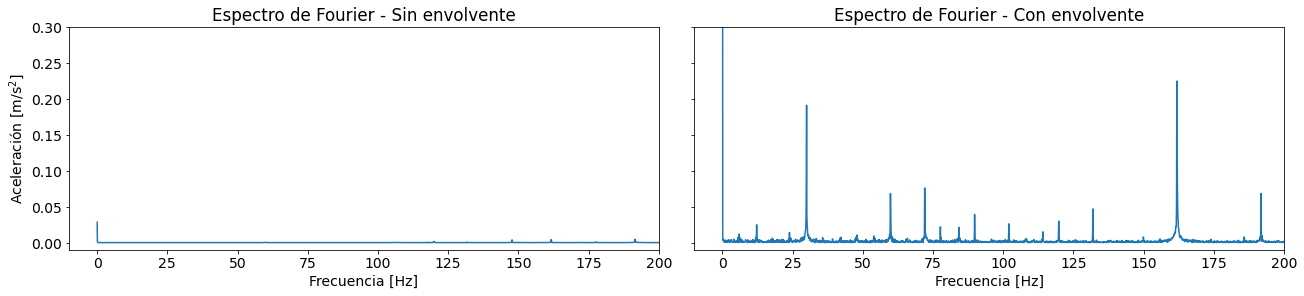

In [11]:
fig, axs = plt.subplots(1, 2, sharey='all', figsize=(18, 4), constrained_layout=True)

axs[0].plot(frq, np.abs(Fx))
axs[0].set(title='Espectro de Fourier - Sin envolvente', xlabel='Frecuencia [Hz]', ylabel='Aceleración [m/s$^2$]',
         xlim=(-10, 200), ylim=(-.01, .3))

axs[1].plot(frq, np.abs(Fe))
axs[1].set(title='Espectro de Fourier - Con envolvente', xlabel='Frecuencia [Hz]',
         xlim=(-10, 200))

# # Visualizar armónicos
# hz = 30   # Frecuencia de giro
# for axi in axs:
#     for f in np.arange(hz, 500, hz):
#             axi.axvline(f, c='firebrick', linestyle='--', zorder=-10, linewidth=1.5)

plt.show()

# Degradación de componentes

Importar nuevas librerías

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

## Cargar y visualizar datos

Degradación en rodamientos

In [15]:
data_01 = pd.read_csv('data/02_rms1.txt')
data_02 = pd.read_csv('data/02_rms2.txt')
data_03 = pd.read_csv('data/02_rms3.txt')

t1 = pd.read_csv('data/02_time1.txt')
t2 = pd.read_csv('data/02_time2.txt')
t3 = pd.read_csv('data/02_time3.txt')

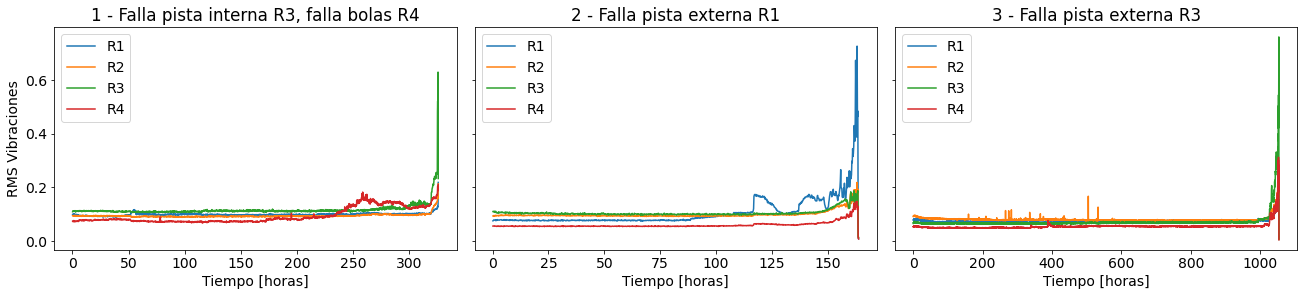

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey='all', constrained_layout=True)

axs[0].set_ylabel('RMS Vibraciones')

lines = axs[0].plot(t1/60, data_01)
axs[0].legend(lines, ['R1', 'R2', 'R3', 'R4'])
axs[0].set_xlabel('Tiempo [horas]')
axs[0].set_title('1 - Falla pista interna R3, falla bolas R4')

axs[1].plot(t2/60, data_02)
axs[1].legend(lines, ['R1', 'R2', 'R3', 'R4'])
axs[1].set_xlabel('Tiempo [horas]')
axs[1].set_title('2 - Falla pista externa R1')

axs[2].plot(t3/60, data_03)
axs[2].legend(lines, ['R1', 'R2', 'R3', 'R4'])
axs[2].set_xlabel('Tiempo [horas]')
axs[2].set_title('3 - Falla pista externa R3')

plt.show()